# **Entrega 2 - Reconocimiento de patrones**

In [ ]:
# Importar librerias necesarias. Si necesita mas, incluyalas aqui
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ejercicio 1**
Realice la estructuración de los siguientes [archivos](https://drive.google.com/file/d/1P6GoINnF1N68RrNQ9dXAI6dUfzO1IiZD/view?usp=sharing). A continuación, cargue las imágenes y guárdelas en una lista con el nombre que ud desee. Esta lista será la base para la realización de los demás ejercicios. En esta sección, puede añadir las celdas de código que considere. 

In [ ]:
path = "/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_images/"

#---- Introduzca su codigo aqui
list_ext=[".png",".jpg"]
list_files=[]
for file_ in os.listdir(path):
  ext=os.path.splitext(file_)[1].lower()
  if ext in list_ext:
    list_files.append(path + file_)
print(list_files, "\n", len(list_files))

['/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_images/Muebles colores.jpg', '/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_images/Cosas colores.png', '/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_images/Baboon.png', '/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_images/Candado colores.jpg', '/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_images/frutas colores.png', '/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_images/Formas colores.png'] 
 6


In [ ]:

list_img=[]

for img in list_files:
  img=cv2.imread(img)
  img= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  list_img.append(img)
print(len(list_img))

6


(300, 440, 3)


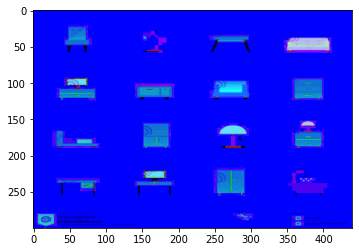

(300, 440, 3)


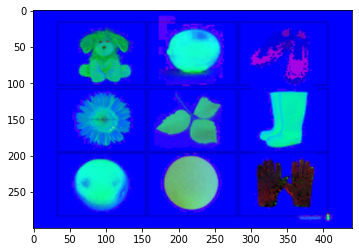

(300, 440, 3)


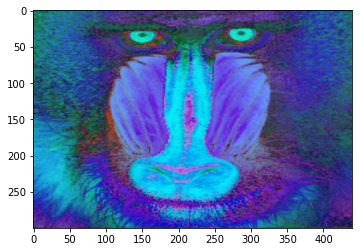

(300, 440, 3)


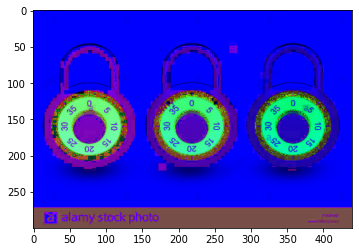

(300, 440, 3)


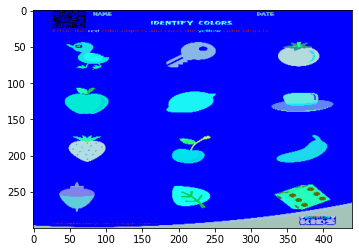

(300, 440, 3)


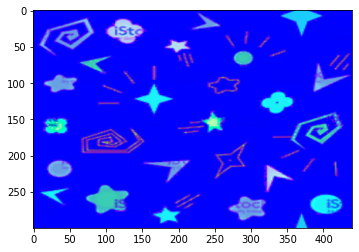

6


In [ ]:
list_resized_img=[]
for img in list_img:

  img=cv2.resize(img,(440,300),cv2.INTER_CUBIC)

  print(img.shape)
  plt.imshow(img)
  plt.show()
  list_resized_img.append(img)


print(len(list_img))

## **Ejercicio 2**

Realice la segmentación de todos los objetos de color amarillo en todas las imágenes ya estructuradas. La imágen resultado debe ser similar a la mostrada [aquí](https://drive.google.com/file/d/1QKtRcSsbDHrz4NkrDlTKubLYf8FMX-GX/view?usp=sharing). En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** recuerden que es más fácil realizar segmentación por color con imágenes en HSV. Para ayudarles, les recomiendo que realicen esto a partir del histograma de una imagen y luego extrapolen a las demás. También les recomiendo que consulten sobre los valores de los rangos del color en HSV.

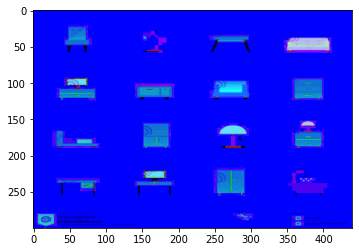

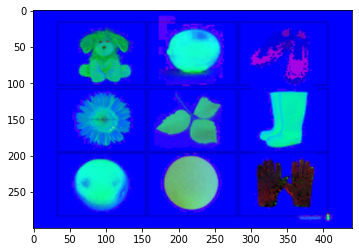

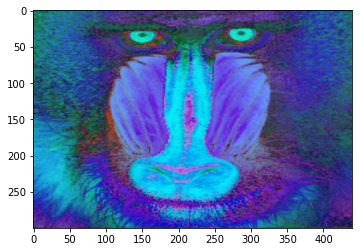

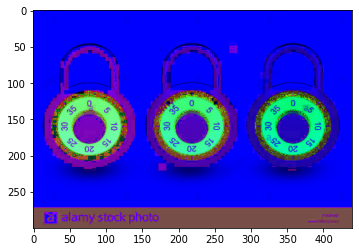

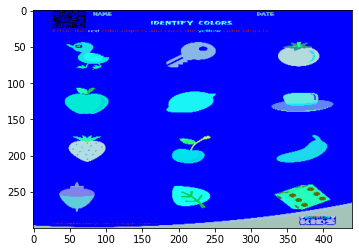

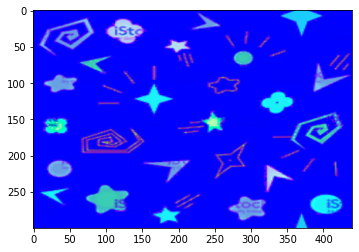

In [ ]:
#---- Introduzca su codigo aqui

list_yellow=[]
n=0
for img in list_resized_img:

  img_y=list_resized_img[n]
  n=n+1
  plt.imshow(img_y)
  plt.show()
  list_yellow.append(img_y)

#---- Muestre imagen

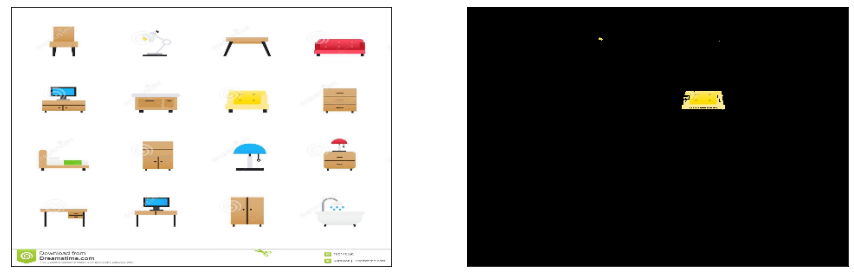

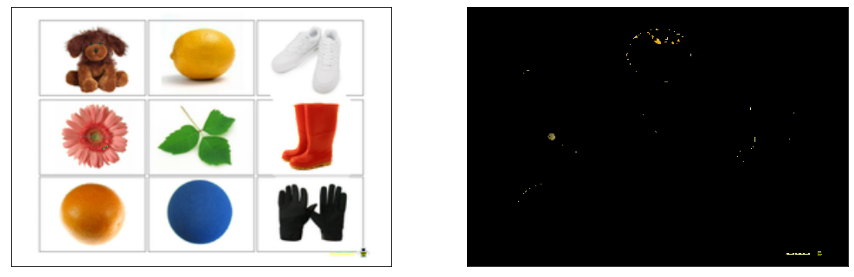

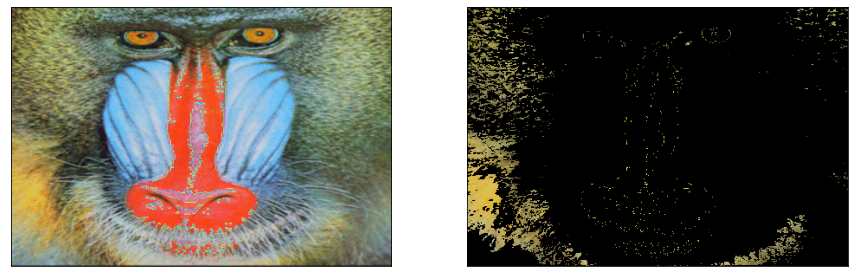

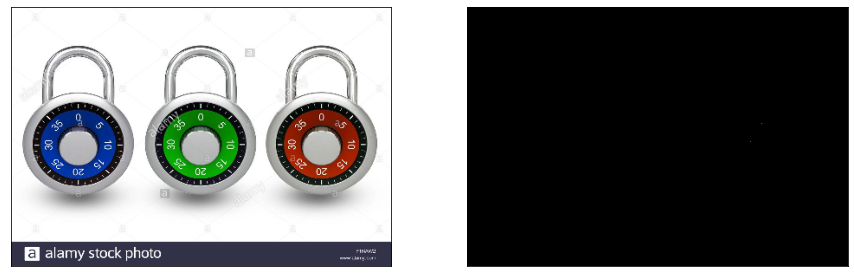

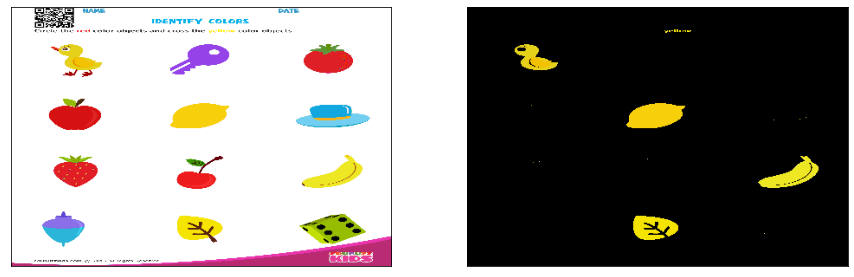

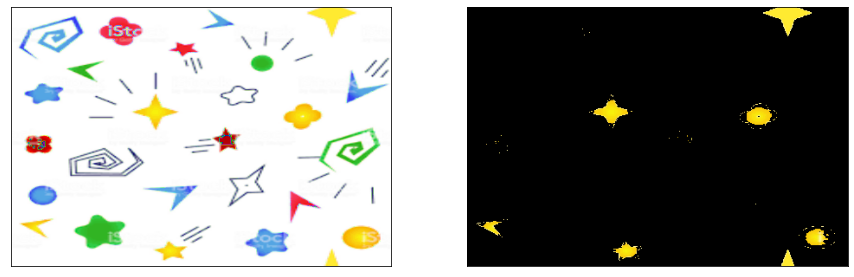

In [ ]:
umbral_bajo = (20,100,100)
umbral_alto = (40,240,240)

for img_y in list_yellow:

  mask = cv2.inRange(img_y, umbral_bajo, umbral_alto)
  res = cv2.bitwise_and(img, img_y, mask=mask)
  # imprimimos los resultados

  # Elegimos el umbral de rojo en HSV
  umbral_bajo1 = (22,80,100)
  umbral_alto1 = (28,240,240)
  # Elegimos el segundo umbral de rojo en HSV
  umbral_bajo2 = (24,80,100)
  umbral_alto2 = (30,255,255)
  # hacemos la mask y filtramos en la original
  mask1 = cv2.inRange(img_y, umbral_bajo1, umbral_alto1)
  mask2 = cv2.inRange(img_y, umbral_bajo2, umbral_alto2)
  mask = mask1 + mask2
  res = cv2.bitwise_and(img_y, img_y, mask = mask)

  fig, axes = plt.subplots(1,2, figsize = (15,5))
  axes[0].imshow( cv2.cvtColor(img_y,cv2.COLOR_HSV2RGB) ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image
  axes[1].imshow( cv2.cvtColor(res,cv2.COLOR_HSV2RGB) ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show Resul

## **Ejercicio 3**

Realice la segmentación de de todos los objetos en todas las imágenes ya estructuradas en escala de grises (ver la siguiente [imagen](https://drive.google.com/file/d/1qRz_iDHFv9v_6vjDsAFEFgjv6xjfGQgc/view?usp=sharing)). Realice la extracción del fondo de la imágen y deje solo los objetos, tal y como se muestran en las 2 columnas de la imagen. Las imágenes de cada columna se calculan de manera independiente. En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** Las dos imágenes pueden obtenerse usando umbralización. 

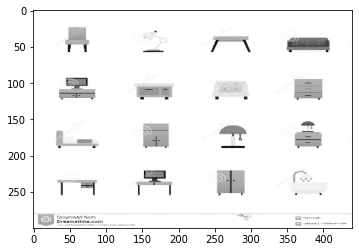

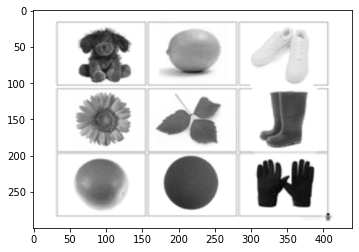

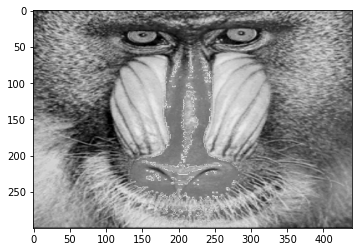

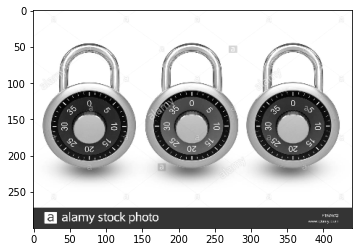

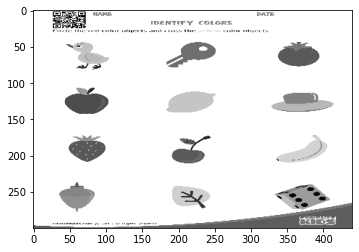

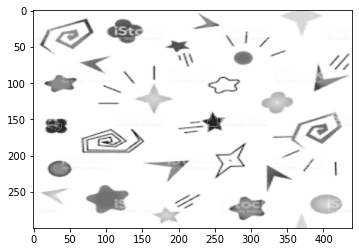

In [ ]:
#---- Introduzca su codigo aqui
list_gray=[]
n=0
for img in list_resized_img:
  img_g=list_resized_img[n]
  img_rgb=cv2.cvtColor(img_g, cv2.COLOR_HSV2RGB)
  img_gray=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

  list_gray.append(img_gray)
  n=n+1


for img_gray in list_gray:
  plt.imshow(img_gray,cmap="gray")
  plt.show()



#---- Muestre imagen

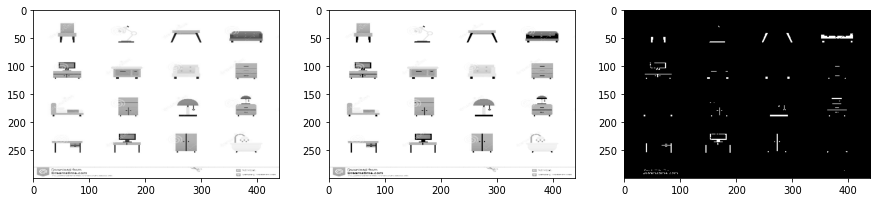

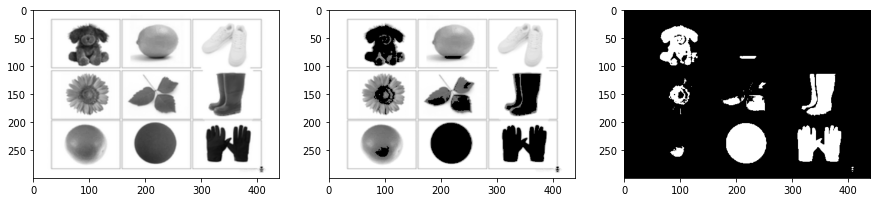

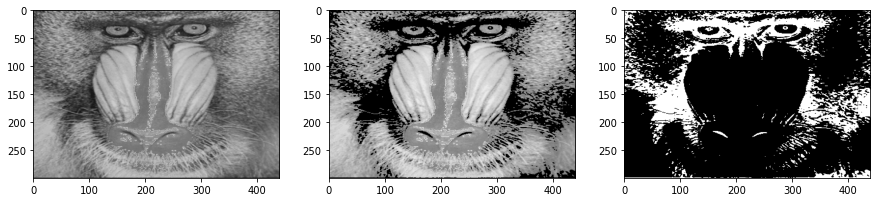

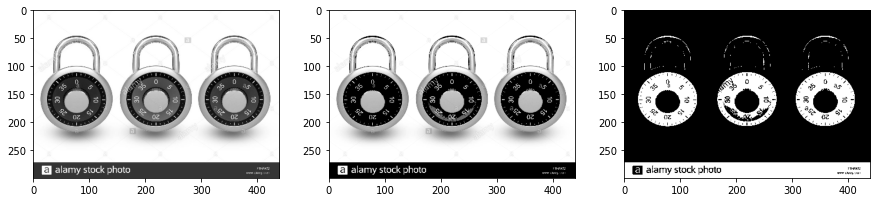

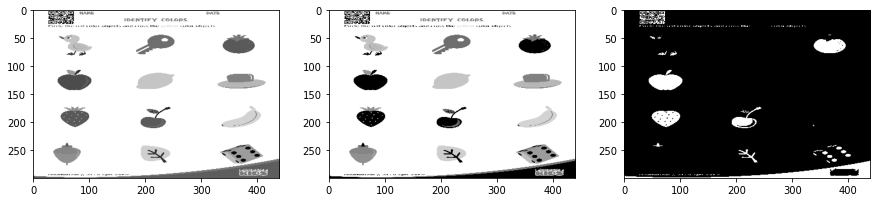

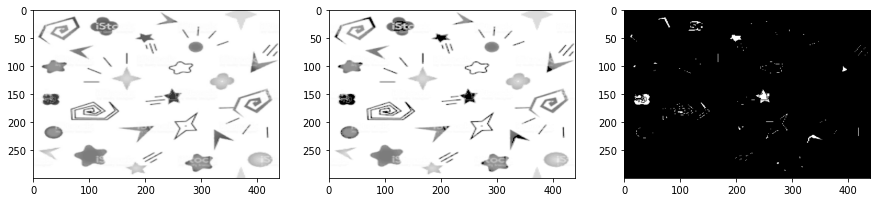

In [ ]:
for i in list_gray:
  ret, thresh1 = cv2.threshold (i,100,255,cv2.THRESH_TOZERO)
  ret2, thresh2 = cv2.threshold (i,100,255, cv2.THRESH_BINARY_INV)
  fig,axes = plt.subplots (1,3, figsize =(15,15))
  axes[0].imshow (cv2.cvtColor(i,cv2.COLOR_BGR2RGB))
  axes[1].imshow (thresh1,'gray')
  axes[2].imshow (thresh2, 'gray')

## **Ejercicio 4**

A partir de la imagen [sudoku1.jpg](https://drive.google.com/file/d/14tjOAYXvLhl38AFsVyie82MGAlXPeYH0/view?usp=sharing), extraiga el siguiente sudoku y extraiga la siguiente [perspectiva](https://drive.google.com/file/d/1IJH6-cVDJOTyoWwdJofjHKoocba5eyKJ/view?usp=sharing) \\

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

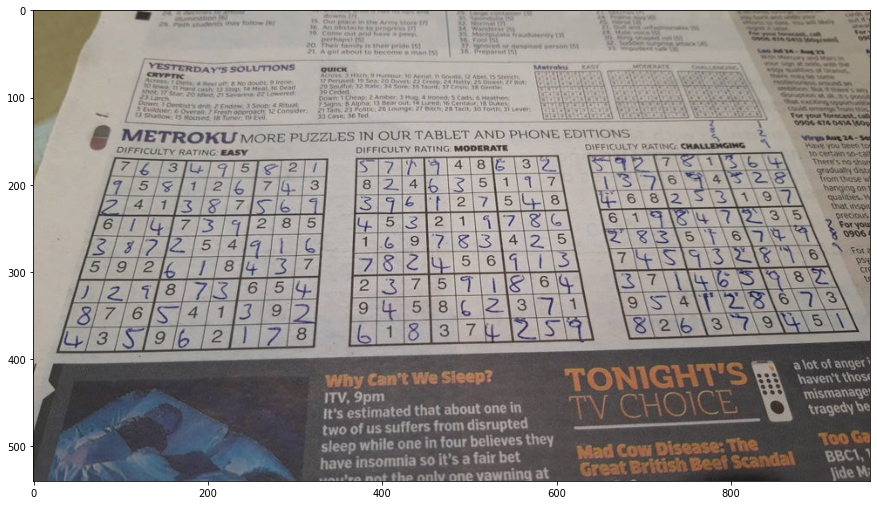

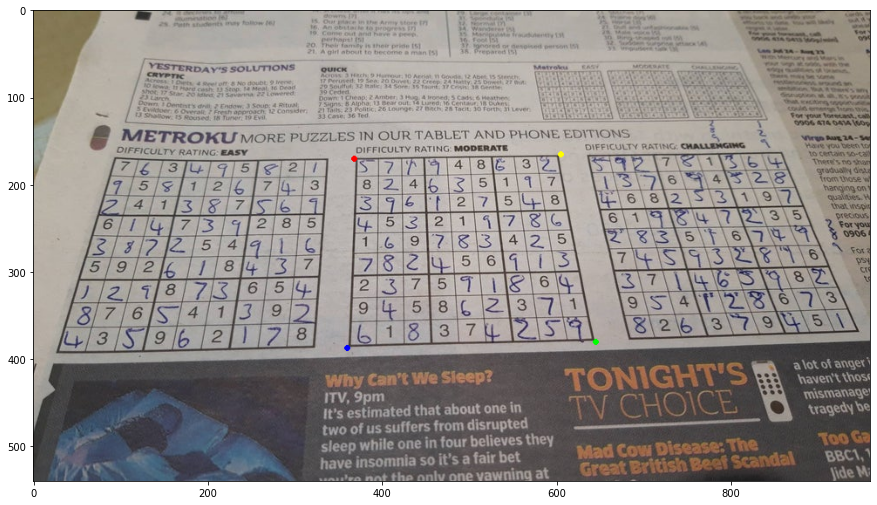

In [25]:
#---- Introduzca su codigo aqui
img=cv2.imread("/content/drive/MyDrive/Patrones/patrones-master/repositorio/patrones/Evaluacion2/E2_imagenes_ejercicio_4/sudoku1.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

_,ax=plt.subplots(figsize=(15,10))
ax.imshow(img)


cv2.circle(img, ( 368 , 170 ), 2, [255,0,0],2)#Red
cv2.circle(img, ( 360 , 387 ), 2, [0,0,255],2)#Blue
cv2.circle(img, ( 605 , 165 ), 2, [255,255,0],2)#Yellow
cv2.circle(img, ( 645 , 380 ), 2, [0,255,0],2)#Green
plt.figure(figsize=(15,10))
plt.imshow(img)

# Confirm selected points
points = np.float32([[ 368 , 170],[ 360 , 387 ],[ 605 , 165 ],[ 645 , 380 ]])

# Create the output image we want
output_size = (300,300)
mapping = np.float32([[0,300],[0,0],[300,300],[300,0]])

Perspective = cv2.getPerspectiveTransform(points, mapping)
imagePerspective = cv2.warpPerspective(img, Perspective, output_size)


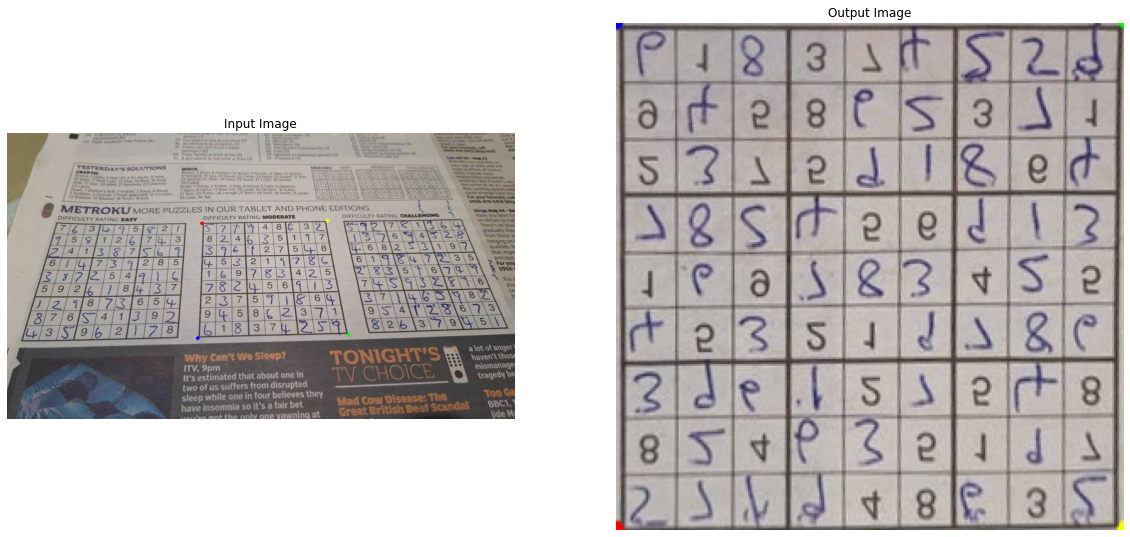

In [26]:
_, axes = plt.subplots(1,2, figsize = (20,10))
axes[0].imshow(img); axes[0].set_title('Input Image' ); axes[0].set_axis_off()
axes[1].imshow(imagePerspective); axes[1].set_title('Output Image'); axes[1].set_axis_off()
plt.show()